In [1]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

# XED Data Cleaning and Preprocessing

- reading the data
- split the labels into three columns:label_1, label_2, label_3
- fill the missing values in label_2 with the corresponding values in label_1
- data cleaning: removing the punctuations and the stopwords
- tokenization

In [2]:
df = pd.read_csv('/Users/ganiyuopeyemi/desktop/NLP/XED-master/AnnotatedData/en-annotated.tsv',sep='\t',header = None, names = ["sent", "label_1"], error_bad_lines=False)
df.head()

,sent,label_1
0,", ...",1
1,!,"1, 4, 7"
2,... And I don't think we need to discuss the T...,"8, 1"
3,* So get up out of your bed,1
4,A confession that you hired [PERSON] ... and a...,"1, 6"


In [3]:
df.shape

(17528, 2)

In [4]:
df[["label_1", "label_2"]] = df['label_1'].str.split(",", 1, expand=True)
df[["label_2", "label_3"]] = df['label_2'].str.split(",", 1, expand=True)

In [5]:
df.head()

,sent,label_1,label_2,label_3
0,", ...",1,None,None
1,!,1,4,7
2,... And I don't think we need to discuss the T...,8,1,None
3,* So get up out of your bed,1,None,None
4,A confession that you hired [PERSON] ... and a...,1,6,None


In [6]:
df["label_1"] = pd.to_numeric(df["label_1"])
df["label_2_fill"] = np.where(df.label_2.isnull(), df.label_1, df.label_2)
df["label_2_fill"] = pd.to_numeric(df["label_2_fill"])

In [7]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [8]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
               
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    table = str.maketrans('', '', string.punctuation)
    lst_text = [w.translate(table) for w in lst_text]
                   
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [9]:
df["text_clean"] = df["sent"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords= lst_stopwords))

In [10]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["text_clean"]), axis=1)
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents
0,", ...",1,None,None,1,,[]
1,!,1,4,7,4,,[]
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t..."
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]"
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,..."


# SentiArt Calculations

In [11]:
TC = '250kSentiArt_EN.xlsx' 

In [12]:
sa = pd.read_excel('/Users/ganiyuopeyemi/desktop/NLP/SentiArt-main/250kSentiArt_EN.xlsx') #    
print(sa)

          word   AAPz  ang_z  fear_z  disg_z  hap_z  sad_z  surp_z
0            a -0.635  1.569   1.047   0.844  1.649  1.820   0.154
1           aa -1.402 -0.916  -0.349  -1.284 -1.335 -1.525  -1.610
2          aaa -1.287 -0.624  -0.063  -0.641 -1.227 -1.132  -1.194
3       aaaaah -0.329 -0.400  -0.021  -0.134  0.565  0.372  -0.364
4        aaaam  0.016 -0.592   0.513  -0.800 -0.741 -1.194  -0.686
...        ...    ...    ...     ...     ...    ...    ...     ...
241488    zzip -0.789  0.407   0.374  -0.387  0.434  0.251   0.284
241489     zzp -0.444 -0.598  -0.311  -0.957 -1.220 -0.081  -1.080
241490     zzz -0.405 -1.161  -0.498   0.165 -0.968  0.653  -0.510
241491  zzzing  0.361  1.971   1.496   0.678  0.857  1.654   1.698
241492   zzzzz -0.367 -0.473   0.190  -0.457 -1.579 -0.433  -0.923

[241493 rows x 8 columns]


In [13]:
fn = 'XED.txt'

In [14]:
sent_mean_ang_z = []
sent_mean_fear_z = []
sent_mean_disg_z = []
sent_mean_hap_z = []
sent_mean_sad_z = []
sent_mean_surp_z = []


In [15]:
my_list = []
for sent in df.tokenized_sents:
    my_list.append(sent)

In [16]:
len(my_list)

17528

In [17]:
for t in my_list:
    dt = sa.query('word in @t')
    sent_mean_ang_z.append(dt.ang_z.mean())
    sent_mean_fear_z.append(dt.fear_z.mean())
    sent_mean_disg_z.append(dt.disg_z.mean())
    sent_mean_hap_z.append(dt.hap_z.mean())
    sent_mean_sad_z.append(dt.sad_z.mean())
    sent_mean_surp_z.append(dt.surp_z.mean())


In [18]:
df['ang'] = sent_mean_ang_z
df['fear'] = sent_mean_fear_z
df['disg'] = sent_mean_disg_z
df['hap'] = sent_mean_hap_z
df['sad'] = sent_mean_sad_z
df['surp'] = sent_mean_surp_z
df = round(df,3)

In [1]:
word_list = []
for sent in df.tokenized_sents:
    for word in sent:
        word_list.append(word)

NameError: name 'df' is not defined

In [27]:
print(len(word_list))
print(len(set(word_list)))

130534
8586


In [30]:
st_words = []
for word in sa.word:
    st_words.append(word)
print(len(st_words))

241493


In [31]:
match = []
for word in word_list:
    if word in st_words:
        match.append(word)

In [32]:
len(match)

129534

In [36]:
print(len(set(match)))

7938


In [39]:
len(set(match))

79.38

In [42]:
(len(set(match))/len(set(word_list)))*100

92.45283018867924

In [21]:
df.shape

(17528, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sent             17528 non-null  object 
 1   label_1          17528 non-null  int64  
 2   label_2          3873 non-null   object 
 3   label_3          849 non-null    object 
 4   label_2_fill     17528 non-null  int64  
 5   text_clean       17528 non-null  object 
 6   tokenized_sents  17528 non-null  object 
 7   ang              17490 non-null  float64
 8   fear             17490 non-null  float64
 9   disg             17490 non-null  float64
 10  hap              17490 non-null  float64
 11  sad              17490 non-null  float64
 12  surp             17490 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.7+ MB


In [20]:
print(df.ang.isna().sum())      
print(df.fear.isna().sum())   
print(df.disg.isna().sum()) 
print(df.hap.isna().sum())
print(df.sad.isnull().sum())
print(df.surp.isnull().sum())

38
38
38
38
38
38


In [21]:
df_38 = df.loc[pd.isna(df["disg"]), :]
df_38.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN
202,Argh ! Kaili !,1,None,None,1,argh kaili,"[argh, kaili]",NaN,NaN,NaN,NaN,NaN,NaN
287,Bullshit !,1,3,None,3,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN
289,Bullshit .,1,7,None,7,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#df_38.to_csv('df_38.csv')

In [22]:
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t...",0.240,1.354,-0.002,0.818,0.657,-0.216
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]",0.524,0.638,0.129,0.776,0.422,-0.158
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,...",0.893,0.984,0.449,1.317,0.941,0.052


In [23]:
df.isna().sum()

sent                   0
label_1                0
label_2            13655
label_3            16679
label_2_fill           0
text_clean             0
tokenized_sents        0
ang                   38
fear                  38
disg                  38
hap                   38
sad                   38
surp                  38
dtype: int64

Mapping the target column based on the mapping of XED.

Removing the missing values.

Exploring the distribution of the classes in label_1 and label_2 from XED and the target of SentiArt 


In [164]:
df["target"] = df[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)
df["target_name"] = df[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)

In [165]:
emo_map = {"ang": int(1), "fear": int(4), "disg": int(3), "hap": int(5), "sad" : int(6), "surp": int(7)}
df = df.replace({"target": emo_map})
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp,target,target_name
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t...",0.240,1.354,-0.002,0.818,0.657,-0.216,4.0,fear
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]",0.524,0.638,0.129,0.776,0.422,-0.158,5.0,hap
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,...",0.893,0.984,0.449,1.317,0.941,0.052,5.0,hap


In [166]:
df = df[["text_clean", "label_1", "label_2_fill", "ang", "fear", "disg", "hap", "sad", "surp", "target", "target_name"]]

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_clean    17528 non-null  object 
 1   label_1       17528 non-null  int64  
 2   label_2_fill  17528 non-null  int64  
 3   ang           17490 non-null  float64
 4   fear          17490 non-null  float64
 5   disg          17490 non-null  float64
 6   hap           17490 non-null  float64
 7   sad           17490 non-null  float64
 8   surp          17490 non-null  float64
 9   target        17490 non-null  float64
 10  target_name   17490 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.5+ MB


In [168]:
df = df.dropna().reset_index(drop=True)
df.shape

(17490, 11)

In [169]:
df.target.value_counts()

4.0    7154
5.0    6243
6.0    2482
7.0     941
1.0     578
3.0      92
Name: target, dtype: int64

In [170]:
df.label_1.value_counts()

1    3703
2    2706
8    2684
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [171]:
df.label_2_fill.value_counts()

2    2701
5    2516
1    2486
7    2080
6    2048
3    2028
4    2016
8    1615
Name: label_2_fill, dtype: int64

In [172]:
df_anger = df.loc[df["label_1"] == 1]
df_anger["target_name"].value_counts()

fear    1724
hap     1219
sad      427
surp     161
ang      151
disg      21
Name: target_name, dtype: int64

In [173]:
df_anticipation = df.loc[df["label_1"] == 2]
df_anticipation["target_name"].value_counts()

fear    1110
hap     1024
sad      352
surp     168
ang       40
disg      12
Name: target_name, dtype: int64

In [174]:
df_disgust = df.loc[df["label_1"] == 3]
df_disgust["target_name"].value_counts()

hap     592
fear    589
sad     295
ang      94
surp     44
disg     25
Name: target_name, dtype: int64

In [175]:
df_fear = df.loc[df["label_1"] == 4]
df_fear["target_name"].value_counts()

fear    886
hap     464
sad     258
ang      97
surp     77
disg      9
Name: target_name, dtype: int64

In [176]:
df_joy = df.loc[df["label_1"] == 5]
df_joy.target_name.value_counts()

hap     891
fear    371
sad     358
surp    188
ang      32
disg      3
Name: target_name, dtype: int64

In [177]:
df_sad = df.loc[df["label_1"] == 6]
df_sad.target_name.value_counts()

fear    829
hap     455
sad     284
surp     72
ang      57
disg      5
Name: target_name, dtype: int64

In [178]:
df_surp = df.loc[df["label_1"] == 7]
df_surp.target_name.value_counts()

fear    528
hap     458
sad     258
surp    110
ang      59
disg      9
Name: target_name, dtype: int64

In [179]:
df_trust = df[df["label_1"] == 8]
df_trust.target_name.value_counts()

hap     1140
fear    1117
sad      250
surp     121
ang       48
disg       8
Name: target_name, dtype: int64

In [180]:
df_anger_2 = df[df["label_2_fill"] == 1]
df_anger_2.target_name.value_counts()                 

fear    1204
hap      792
sad      279
surp     107
ang       94
disg      10
Name: target_name, dtype: int64

In [181]:
df_antic_2 = df[df["label_2_fill"] == 2]
df_antic_2.target_name.value_counts()

fear    1135
hap     1033
sad      328
surp     152
ang       43
disg      10
Name: target_name, dtype: int64

In [182]:
df_disg_2 = df[df["label_2_fill"] == 3]
df_disg_2.target_name.value_counts()

fear    757
hap     749
sad     335
ang     105
surp     55
disg     27
Name: target_name, dtype: int64

In [183]:
df_fear_2 = df[df["label_2_fill"] == 4]
df_fear_2.target_name.value_counts()

fear    991
hap     542
sad     277
ang     106
surp     86
disg     14
Name: target_name, dtype: int64

In [184]:
df_hap_2 = df[df["label_2_fill"] == 5]
df_hap_2.target_name.value_counts()

hap     1209
fear     597
sad      417
surp     241
ang       46
disg       6
Name: target_name, dtype: int64

In [185]:
df_sad_2 = df[df["label_2_fill"] == 6]
df_sad_2.target_name.value_counts()

fear    995
hap     556
sad     331
surp     87
ang      72
disg      7
Name: target_name, dtype: int64

In [186]:
df_surp_2 = df[df["label_2_fill"] == 7]
df_surp_2.target_name.value_counts()

fear    774
hap     688
sad     369
surp    153
ang      84
disg     12
Name: target_name, dtype: int64

In [187]:
df_trust_2 = df[df["label_2_fill"] == 8]
df_trust_2.target_name.value_counts()

fear    701
hap     674
sad     146
surp     60
ang      28
disg      6
Name: target_name, dtype: int64

# Classification

In [188]:
df["label_fear"] = df["label_1"].map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})

In [189]:
df["target_fear"] = df["target"].map({1:0, 3:0, 4:1, 5:0, 6:0, 7:0})

In [190]:
df.target_fear.value_counts()

0    10336
1     7154
Name: target_fear, dtype: int64

In [191]:
df.label_fear.value_counts()

0    15699
1     1791
Name: label_fear, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [193]:
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [194]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# LogisticRegression 
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

In [195]:
print("Report of MultinomialNB_fear")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear
Confusion Matrix 
 [[3143 1578]
 [ 316  210]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      4721
           1       0.12      0.40      0.18       526

    accuracy                           0.64      5247
   macro avg       0.51      0.53      0.47      5247
weighted avg       0.83      0.64      0.71      5247

Accuracy Score:  0.639031827711073


In [196]:
print("Report of LinearSVC_fear")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear
Confusion Matrix 
 [[2789 1932]
 [ 276  250]]
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      4721
           1       0.11      0.48      0.18       526

    accuracy                           0.58      5247
   macro avg       0.51      0.53      0.45      5247
weighted avg       0.83      0.58      0.66      5247

Accuracy Score:  0.5791881074899943


In [197]:
print("Report of LogisticRegression_fear")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear
Confusion Matrix 
 [[3006 1715]
 [ 315  211]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      4721
           1       0.11      0.40      0.17       526

    accuracy                           0.61      5247
   macro avg       0.51      0.52      0.46      5247
weighted avg       0.83      0.61      0.69      5247

Accuracy Score:  0.6131122546216886


In [198]:
df["label_hap"] = df["label_1"].map({1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
df["target_hap"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})

In [199]:
df.target_hap.value_counts()

0    11247
1     6243
Name: target_hap, dtype: int64

In [200]:
df.label_hap.value_counts()

0    15647
1     1843
Name: label_hap, dtype: int64

In [201]:
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [202]:
print("Report of MultinomialNB_hap")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap
Confusion Matrix 
 [[4175  509]
 [ 445  118]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4684
           1       0.19      0.21      0.20       563

    accuracy                           0.82      5247
   macro avg       0.55      0.55      0.55      5247
weighted avg       0.83      0.82      0.82      5247

Accuracy Score: 0.8181818181818182


In [203]:
print("Report of LinearSVC_hap")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap
Confusion Matrix 
 [[3169 1515]
 [ 298  265]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      4684
           1       0.15      0.47      0.23       563

    accuracy                           0.65      5247
   macro avg       0.53      0.57      0.50      5247
weighted avg       0.83      0.65      0.72      5247

Accuracy Score 0.6544692205069563


In [204]:
print("Report of LogisticRegression_hap")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap
Confusion Matrix 
 [[3376 1308]
 [ 334  229]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      4684
           1       0.15      0.41      0.22       563

    accuracy                           0.69      5247
   macro avg       0.53      0.56      0.51      5247
weighted avg       0.83      0.69      0.74      5247

Accuracy Score 0.6870592719649323


In [205]:
df["label_sad"] = df["label_1"].map({1:0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
df["target_sad"] = df["target"].map({1:0, 3:0, 4:0, 5:0, 6:1, 7:0})

In [206]:
df.target_sad.value_counts()

0    15008
1     2482
Name: target_sad, dtype: int64

In [207]:
df.label_sad.value_counts()

0    15788
1     1702
Name: label_sad, dtype: int64

In [208]:
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [209]:
print("Report of MultinomialNB_sad")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad
Confusion Matrix 
 [[4735    3]
 [ 509    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4738
           1       0.00      0.00      0.00       509

    accuracy                           0.90      5247
   macro avg       0.45      0.50      0.47      5247
weighted avg       0.82      0.90      0.86      5247

Accuracy Score: 0.9024204307223175


In [210]:
print("Report of LinearSVC_sad")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad
Confusion Matrix 
 [[4289  449]
 [ 454   55]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4738
           1       0.11      0.11      0.11       509

    accuracy                           0.83      5247
   macro avg       0.51      0.51      0.51      5247
weighted avg       0.83      0.83      0.83      5247

Accuracy Score 0.8279016580903373


In [211]:
print("Report of LogisticRegression_sad")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad
Confusion Matrix 
 [[4502  236]
 [ 470   39]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4738
           1       0.14      0.08      0.10       509

    accuracy                           0.87      5247
   macro avg       0.52      0.51      0.51      5247
weighted avg       0.83      0.87      0.85      5247

Accuracy Score 0.8654469220506956


# SentArt vs label_2

In [212]:
df["label_fear_2"] = df["label_2_fill"].map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [213]:
print(df.label_fear_2.value_counts())
print(df.target_fear.value_counts())


0    15474
1     2016
Name: label_fear_2, dtype: int64
0    10336
1     7154
Name: target_fear, dtype: int64


In [214]:
print("Report of MultinomialNB_fear_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear_2
Confusion Matrix 
 [[3113 1541]
 [ 346  247]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      4654
           1       0.14      0.42      0.21       593

    accuracy                           0.64      5247
   macro avg       0.52      0.54      0.49      5247
weighted avg       0.81      0.64      0.70      5247

Accuracy Score:  0.6403659233847913


In [215]:
print("Report of LinearSVC_fear_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear_2
Confusion Matrix 
 [[2764 1890]
 [ 301  292]]
              precision    recall  f1-score   support

           0       0.90      0.59      0.72      4654
           1       0.13      0.49      0.21       593

    accuracy                           0.58      5247
   macro avg       0.52      0.54      0.46      5247
weighted avg       0.82      0.58      0.66      5247

Accuracy Score:  0.5824280541261674


In [216]:
print("Report of LogisticRegression_fear_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear_2
Confusion Matrix 
 [[2981 1673]
 [ 340  253]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      4654
           1       0.13      0.43      0.20       593

    accuracy                           0.62      5247
   macro avg       0.51      0.53      0.47      5247
weighted avg       0.81      0.62      0.69      5247

Accuracy Score 0.6163522012578616


In [217]:
df["label_hap_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [218]:
print(df.label_hap_2.value_counts())
print(df.target_hap.value_counts())

0    14974
1     2516
Name: label_hap_2, dtype: int64
0    11247
1     6243
Name: target_hap, dtype: int64


In [219]:
print("Report of MultinomialNB_hap_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap_2
Confusion Matrix 
 [[3986  460]
 [ 634  167]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4446
           1       0.27      0.21      0.23       801

    accuracy                           0.79      5247
   macro avg       0.56      0.55      0.56      5247
weighted avg       0.77      0.79      0.78      5247

Accuracy Score:  0.7914999047074519


In [220]:
print("Report of LinearSVC_hap_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap_2
Confusion Matrix 
 [[3032 1414]
 [ 435  366]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.77      4446
           1       0.21      0.46      0.28       801

    accuracy                           0.65      5247
   macro avg       0.54      0.57      0.52      5247
weighted avg       0.77      0.65      0.69      5247

Accuracy Score:  0.6476081570421193


In [221]:
print("Report of LogisticRegression_hap_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap_2
Confusion Matrix 
 [[3222 1224]
 [ 488  313]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4446
           1       0.20      0.39      0.27       801

    accuracy                           0.67      5247
   macro avg       0.54      0.56      0.53      5247
weighted avg       0.77      0.67      0.71      5247

Accuracy Score 0.6737183152277492


In [222]:
df["label_sad_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [223]:
print(df.label_sad_2.value_counts())
print(df.target_sad.value_counts())


0    15442
1     2048
Name: label_sad_2, dtype: int64
0    15008
1     2482
Name: target_sad, dtype: int64


In [224]:
print("Report of MultinomialNB_sad_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad_2
Confusion Matrix 
 [[4627    3]
 [ 617    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4630
           1       0.00      0.00      0.00       617

    accuracy                           0.88      5247
   macro avg       0.44      0.50      0.47      5247
weighted avg       0.78      0.88      0.83      5247

Accuracy Score:  0.8818372403278064


In [225]:
print("Report of LinearSVC_sad_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad_2
Confusion Matrix 
 [[4199  431]
 [ 544   73]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4630
           1       0.14      0.12      0.13       617

    accuracy                           0.81      5247
   macro avg       0.52      0.51      0.51      5247
weighted avg       0.80      0.81      0.81      5247

Accuracy Score:  0.8141795311606632


In [226]:
print("Report of LogisticRegression_sad_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad_2
Confusion Matrix 
 [[4404  226]
 [ 568   49]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4630
           1       0.18      0.08      0.11       617

    accuracy                           0.85      5247
   macro avg       0.53      0.52      0.51      5247
weighted avg       0.80      0.85      0.82      5247

Accuracy Score 0.848675433581094


# POS vs NEG

In [227]:
df.head()

,text_clean,label_1,label_2_fill,ang,fear,disg,hap,sad,surp,target,target_name,label_fear,target_fear,label_hap,target_hap,label_sad,target_sad,label_fear_2,label_hap_2,label_sad_2
0,and i dont think we need to discuss the trinit...,8,1,0.240,1.354,-0.002,0.818,0.657,-0.216,4.0,fear,0,1,0,0,0,0,0,0,0
1,so get up out of your bed,1,1,0.524,0.638,0.129,0.776,0.422,-0.158,5.0,hap,0,0,0,1,0,0,0,0,0
2,a confession that you hired person and are res...,1,6,0.893,0.984,0.449,1.317,0.941,0.052,5.0,hap,0,0,0,1,0,0,0,0,1
3,a dead man has one half hour to raise his roll...,1,1,0.531,0.532,0.192,0.705,0.810,-0.044,6.0,sad,0,0,0,0,0,1,0,0,0
4,a guy thats talking about hes gonna solve all ...,1,1,-0.040,0.501,-0.145,0.766,0.492,0.010,5.0,hap,0,0,0,1,0,0,0,0,0


In [228]:
df["label_polarity"] = df["label_1"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1})
df["target_polarity"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
X = df["text_clean"]
y_target = df["target_polarity"]
y_label = df["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [229]:
df.label_polarity.value_counts()

0    10257
1     7233
Name: label_polarity, dtype: int64

In [230]:
df.target_polarity.value_counts()

0    11247
1     6243
Name: target_polarity, dtype: int64

In [231]:
print("Report of MultinomialNB Polarity")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity
Confusion Matrix 
 [[2752  308]
 [1868  319]]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3060
           1       0.51      0.15      0.23      2187

    accuracy                           0.59      5247
   macro avg       0.55      0.52      0.47      5247
weighted avg       0.56      0.59      0.51      5247

Accuracy Score:  0.5852868305698494


In [232]:
print("Report of LinearSVC Polarity")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity
Confusion Matrix 
 [[2126  934]
 [1341  846]]
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      3060
           1       0.48      0.39      0.43      2187

    accuracy                           0.57      5247
   macro avg       0.54      0.54      0.54      5247
weighted avg       0.56      0.57      0.56      5247

Accuracy Score:  0.5664189060415475


In [233]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2257  803]
 [1453  734]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      3060
           1       0.48      0.34      0.39      2187

    accuracy                           0.57      5247
   macro avg       0.54      0.54      0.53      5247
weighted avg       0.55      0.57      0.55      5247

Accuracy Score 0.5700400228702116


# Multiclass Classification

In [234]:
data = df[["text_clean", "label_1", "ang", "fear", "disg", "hap", "sad", "surp", "target", "label_2_fill", "target_name"]]

In [235]:
anticipation = data[data["label_1"] == 2].index
data = data.drop(anticipation, inplace= False)

In [236]:
trust = data[data["label_1"] == 8].index
data = data.drop(trust, inplace= False)

In [237]:
data = data.reset_index(drop=True)

In [238]:
data.target.value_counts()

4.0    4927
5.0    4079
6.0    1880
7.0     652
1.0     490
3.0      72
Name: target, dtype: int64

In [239]:
data.label_1.value_counts()

1    3703
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_clean    12100 non-null  object 
 1   label_1       12100 non-null  int64  
 2   ang           12100 non-null  float64
 3   fear          12100 non-null  float64
 4   disg          12100 non-null  float64
 5   hap           12100 non-null  float64
 6   sad           12100 non-null  float64
 7   surp          12100 non-null  float64
 8   target        12100 non-null  float64
 9   label_2_fill  12100 non-null  int64  
 10  target_name   12100 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.0+ MB


In [241]:
X = data["text_clean"]
y_target = data["target"]
y_label = data["label_1"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [242]:
print("Report of MultinomialNB")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n",confusion_matrix)
print(metrics.classification_report(y_test_l,predictions, zero_division = 0))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB
Confusion Matrix 
 [[  0   0 842 290   5   1]
 [  0   0 333 143   9   0]
 [  0   0 426 115   5   0]
 [  0   0 242 280  14   1]
 [  0   0 388 117   8   0]
 [  0   0 284 121   6   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1138
           3       0.00      0.00      0.00       485
           4       0.17      0.78      0.28       546
           5       0.26      0.52      0.35       537
           6       0.17      0.02      0.03       513
           7       0.00      0.00      0.00       411

    accuracy                           0.20      3630
   macro avg       0.10      0.22      0.11      3630
weighted avg       0.09      0.20      0.10      3630

Accuracy Score:  0.19669421487603306


classes [1. 3. 4. 5. 6. 7.]


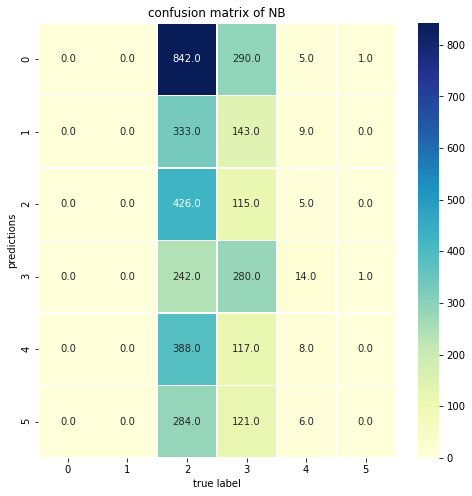

In [243]:
print("classes",text_clf_nb.classes_)
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.title("confusion matrix of NB")
plt.xlabel("true label");
plt.ylabel("predictions");

In [244]:
print("Report of LinearSVC")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC
Confusion Matrix 
 [[ 24   1 600 375 109  29]
 [  8   2 210 174  82   9]
 [ 16   0 284 157  72  17]
 [  2   0 138 269  85  43]
 [ 13   0 274 143  65  18]
 [ 12   0 179 139  64  17]]
              precision    recall  f1-score   support

           1       0.32      0.02      0.04      1138
           3       0.67      0.00      0.01       485
           4       0.17      0.52      0.25       546
           5       0.21      0.50      0.30       537
           6       0.14      0.13      0.13       513
           7       0.13      0.04      0.06       411

    accuracy                           0.18      3630
   macro avg       0.27      0.20      0.13      3630
weighted avg       0.28      0.18      0.12      3630

Accuracy Score:  0.18209366391184573


classes: [1. 3. 4. 5. 6. 7.]


Text(0.5, 1.0, 'confusion matrix of SVC')

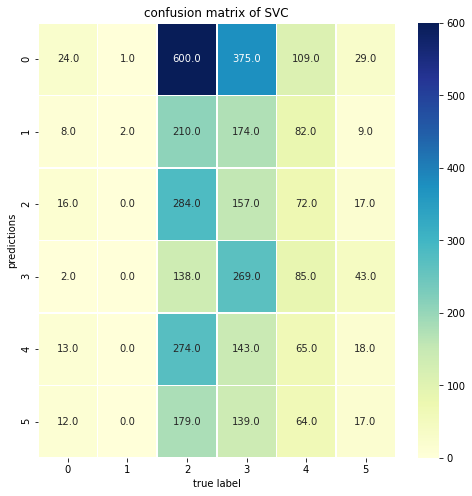

In [245]:
f,ax = plt.subplots(figsize=(8,8))
print("classes:" ,text_clf_lsvc.classes_)   
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.xlabel("true label");
plt.ylabel("predictions");
plt.title("confusion matrix of SVC")

# Polarity 2

In [246]:
data["label_polarity"] = data["label_1"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
data["target_polarity"] = data["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
X = data["text_clean"]
y_target = data["target_polarity"]
y_label = data["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [247]:
data.label_polarity.value_counts()

0    10257
1     1843
Name: label_polarity, dtype: int64

In [248]:
data.target_polarity.value_counts()

0    8021
1    4079
Name: target_polarity, dtype: int64

In [249]:
print("Report of MultinomialNB Polarity 2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity 2
Confusion Matrix 
 [[2880  213]
 [ 452   85]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3093
           1       0.29      0.16      0.20       537

    accuracy                           0.82      3630
   macro avg       0.57      0.54      0.55      3630
weighted avg       0.78      0.82      0.79      3630

Accuracy Score:  0.8168044077134986


In [250]:
print("Report of LinearSVC Polarity 2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity 2
Confusion Matrix 
 [[2233  860]
 [ 301  236]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3093
           1       0.22      0.44      0.29       537

    accuracy                           0.68      3630
   macro avg       0.55      0.58      0.54      3630
weighted avg       0.78      0.68      0.72      3630

Accuracy Score:  0.6801652892561983


In [251]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2387  706]
 [ 346  191]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3093
           1       0.21      0.36      0.27       537

    accuracy                           0.71      3630
   macro avg       0.54      0.56      0.54      3630
weighted avg       0.78      0.71      0.74      3630

Accuracy Score 0.7101928374655647
